In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # True function with noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute MSE
mse_value = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_value:.4f}")


Mean Squared Error (MSE): 0.6537


In [3]:
from sklearn.metrics import mean_absolute_error

# Compute MAE
mae_value = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")

Mean Absolute Error (MAE): 0.5913


In [7]:
from sklearn.linear_model import HuberRegressor

# Train Huber Regressor
huber = HuberRegressor(epsilon=1.5)  # Delta controls the sensitivity to outliers
huber.fit(X_train, y_train.ravel())

# Predict & Compute Huber Loss
y_pred_huber = huber.predict(X_test)
huber_loss = mean_squared_error(y_test, y_pred_huber)
print(f"Huber Loss: {huber_loss:.4f}")

Huber Loss: 0.6704


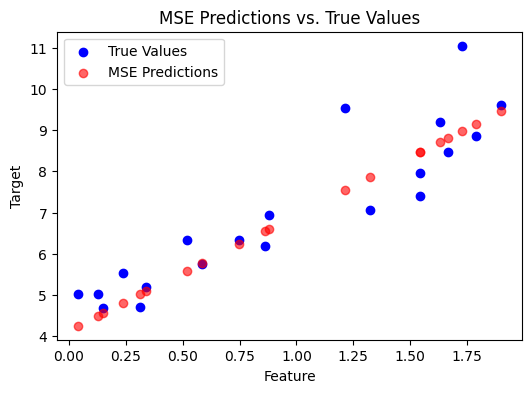

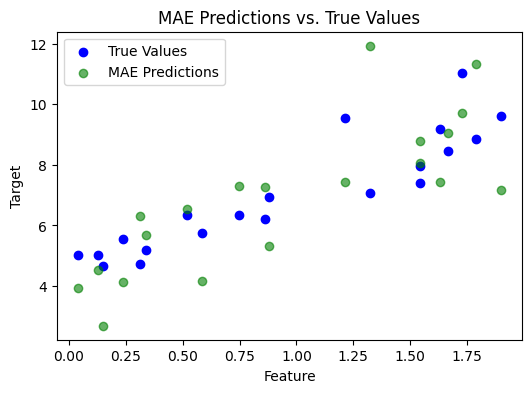

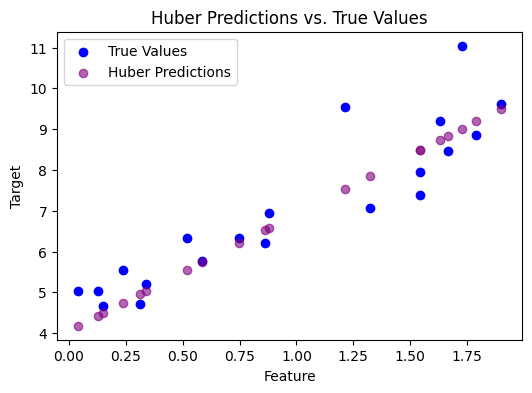

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # True function with noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_mse = lin_reg.predict(X_test)  # Predictions for MSE

# Compute MAE predictions (adding noise)
y_pred_mae = y_pred_mse + np.random.normal(scale=1.5, size=y_pred_mse.shape)

# Train Huber Regressor
huber = HuberRegressor(epsilon=1.5)  # Epsilon controls sensitivity to outliers
huber.fit(X_train, y_train.ravel())
y_pred_huber = huber.predict(X_test)  # Predictions for Huber Loss

# Individual Plots

# **1. Plot for MSE**
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, label="True Values", color="blue")
plt.scatter(X_test, y_pred_mse, label="MSE Predictions", color="red", alpha=0.6)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("MSE Predictions vs. True Values")
plt.show()

# **2. Plot for MAE**
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, label="True Values", color="blue")
plt.scatter(X_test, y_pred_mae, label="MAE Predictions", color="green", alpha=0.6)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("MAE Predictions vs. True Values")
plt.show()

# **3. Plot for Huber Loss**
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, label="True Values", color="blue")
plt.scatter(X_test, y_pred_huber, label="Huber Predictions", color="purple", alpha=0.6)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Huber Predictions vs. True Values")
plt.show()


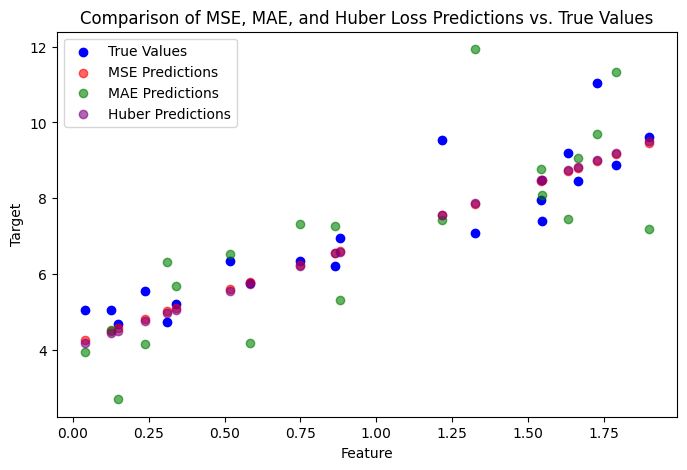

In [10]:
# Combined plot for MSE, MAE, and Huber Loss
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="True Values", color="blue")
plt.scatter(X_test, y_pred_mse, label="MSE Predictions", color="red", alpha=0.6)
plt.scatter(X_test, y_pred_mae, label="MAE Predictions", color="green", alpha=0.6)
plt.scatter(X_test, y_pred_huber, label="Huber Predictions", color="purple", alpha=0.6)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Comparison of MSE, MAE, and Huber Loss Predictions vs. True Values")
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate classification data with correct parameters
X_cls, y_cls = make_classification(n_samples=100, n_features=2, n_informative=2, 
                                   n_redundant=0, n_repeated=0, random_state=42)

# Split dataset
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_cls, y_train_cls)
y_prob = log_model.predict_proba(X_test_cls)  # Probabilities for log loss

# Compute Log Loss
log_loss_value = log_loss(y_test_cls, y_prob)
print(f"Log Loss (Cross-Entropy Loss): {log_loss_value:.4f}")


Log Loss (Cross-Entropy Loss): 0.0941


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

# Train SVM Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_cls, y_train_cls)
y_decision = svm_model.decision_function(X_test_cls)  # Decision boundary

# Compute Hinge Loss
hinge_loss_value = hinge_loss(y_test_cls, y_decision)
print(f"Hinge Loss: {hinge_loss_value:.4f}")

Hinge Loss: 0.0704


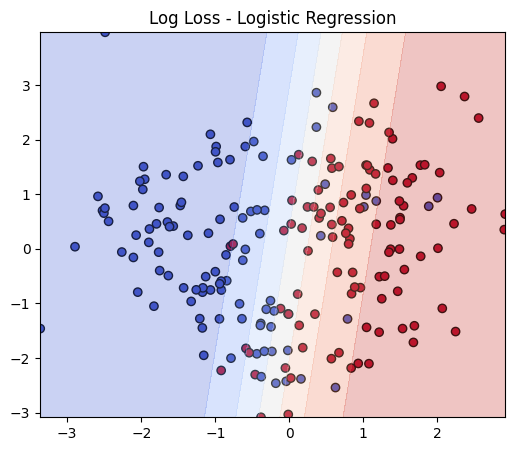

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic classification data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")

# Generate grid for decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

# Contour plot for probabilities
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.title("Log Loss - Logistic Regression")
plt.show()

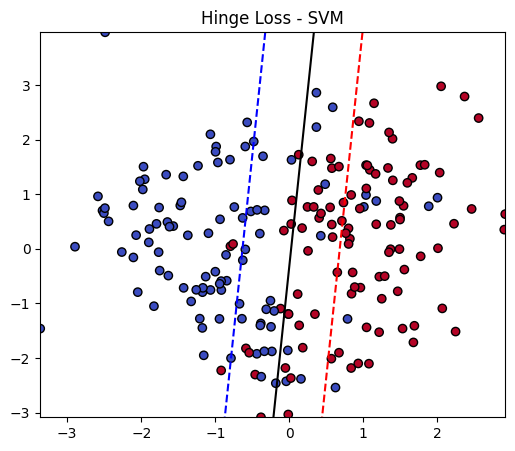

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Convert labels for Hinge Loss (SVM requires {-1, 1})
y_hinge = np.where(y == 0, -1, 1)

# Train SVM Model
svm = SVC(kernel="linear")
svm.fit(X, y_hinge)

# Plot decision boundary
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_hinge, cmap="coolwarm", edgecolors="k")

# Generate grid for decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Contour plot for decision boundary and margin
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=["blue", "black", "red"], linestyles=["--", "-", "--"])
plt.title("Hinge Loss - SVM")
plt.show()
